<a href="https://colab.research.google.com/github/alexmacharia/deep_learning_projects/blob/main/Medical_Images_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [7]:
import glob

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras import layers
from keras.optimizers import Adam

import numpy as np
import matplotlib.pyplot as plt
#%%matplotlib inline

import cv2


In [8]:
train_path = "/content/gdrive/MyDrive/omdena_project/medical_images/train"
test_path = "/content/gdrive/MyDrive/omdena_project/medical_images/test"
val_path = "/content/gdrive/MyDrive/omdena_project/medical_images/val"


In [9]:
height = 224
width = 224
batch_size = 40

In [10]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    train_path,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=(height, width),
    batch_size=batch_size)

Found 6326 files belonging to 4 classes.
Using 5061 files for training.


In [11]:
val_data = tf.keras.preprocessing.image_dataset_from_directory(
    val_path,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=(height, width),
    batch_size=batch_size

)

Found 38 files belonging to 4 classes.
Using 7 files for validation.


In [12]:
test_data = tf.keras.preprocessing.image_dataset_from_directory(
    test_path,
    image_size=(height, width),
    seed=42
    )

Found 771 files belonging to 4 classes.


In [28]:
class_names = train_data.class_names
num_classes = len(class_names)
num_classes

4

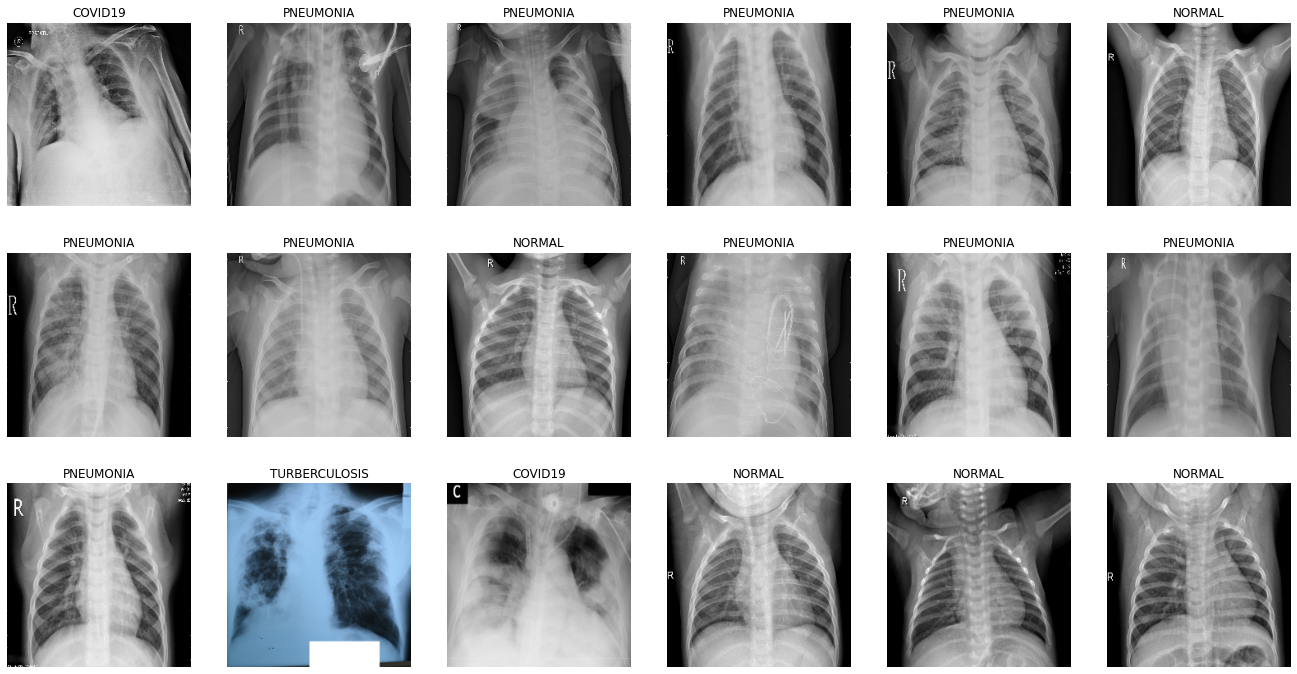

In [14]:
plt.figure(figsize=(23, 12))
for images, labels in train_data.take(1):
    for i in range(18):
        ax = plt.subplot(3, 6, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [16]:
for image_batch, labels_batch in train_data:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(40, 224, 224, 3)
(40,)


In [26]:
for image_batch, labels_batch in val_data:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(7, 224, 224, 3)
(7,)


In [27]:
for image_batch, labels_batch in test_data:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 224, 224, 3)
(32,)


In [19]:
model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(height, width, 3)),
    Conv2D(16, kernel_size=(3,3), padding='same', activation='relu'),
    MaxPool2D(),
    Conv2D(32, (3,3), padding='same', activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(num_classes)

])

In [20]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 100352)            0

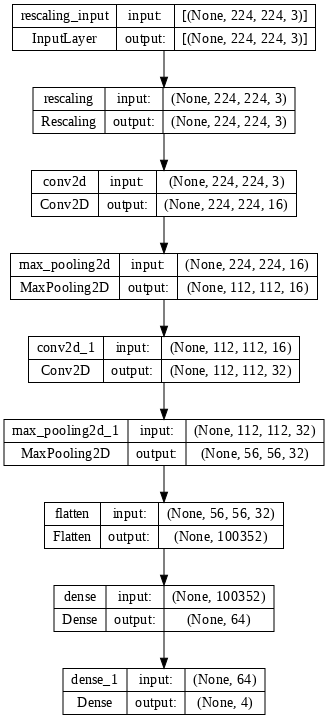

In [22]:
tf.keras.utils.plot_model(model=model, dpi=72, show_shapes=True)

In [25]:
epochs = 15
history = model.fit(train_data,
                    validation_data=val_data,
                    epochs=epochs,
                    )

Epoch 1/15


ValueError: ignored

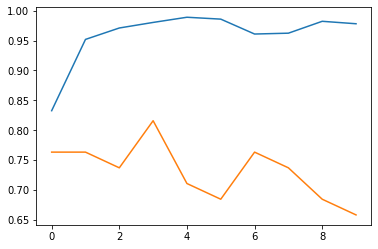

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [18]:
epochs = 10

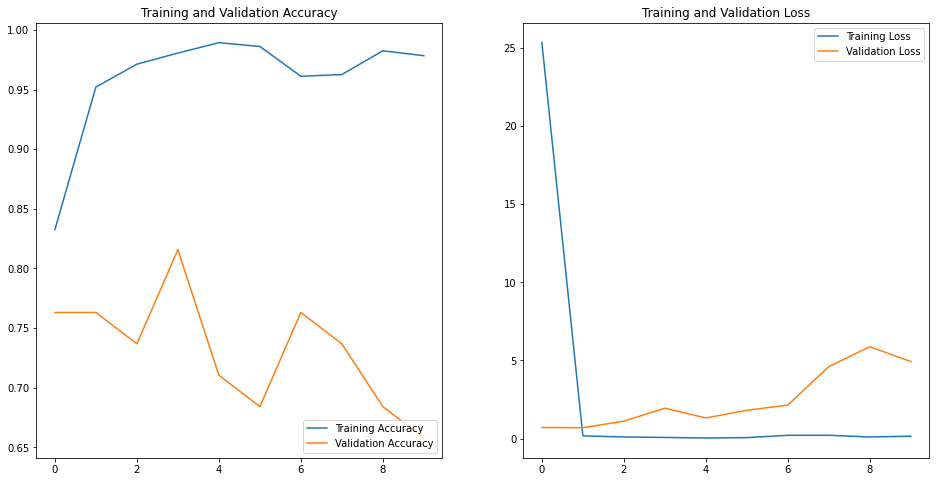

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [23]:
data_augmentation = keras.Sequential(
    [
     layers.experimental.preprocessing.RandomFlip("horizontal", input_shape = (224,224,3)),
     layers.experimental.preprocessing.RandomRotation(0.1),
     layers.experimental.preprocessing.RandomZoom(0.1)
    ]
)

In [25]:
plt.figure(figsize=(10, 10))
for images, _ in train_batches.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

AttributeError: ignored

<Figure size 720x720 with 0 Axes>